In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from itertools import cycle
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from scipy import interp
%matplotlib inline


In [3]:
data_read=pd.read_csv("/Volumes/Samsung_T5/SOCRATES/Advanced_analysis_files/LATEST_ANALYSIS/FINAL_USED_DATA/AllData_includingNonsignificant_ContinuousSensQUARTILED_ReadyforAnalysis_wMutation.txt",sep="\t")
data_read.head()


,Mutation_Status,Drug,CellLine,Quartile,ContinousSensitivity,AKT308_phos,AKT473_phos,ATF2_phos,AXL_phos,bCATENIN_phos,...,NCOR2_mut,ZNF543_mut,OR5T2_mut,GLI2_mut,SMARCA4_mut,KIAA1211_mut,TENM3_mut,TG_mut,SV2C_mut,RIMS2_mut
0,KRAS_mutant,AUY922,A549,2,0.183428,1.723378,1.382587,0.525571,0.280380,0.198916,...,0,0,0,0,1,0,0,0,0,0
1,Wild_type,AUY922,CORL105,1,0.037535,1.692594,1.174550,0.223668,0.201581,0.248734,...,0,0,0,0,0,0,0,0,0,0
2,KRAS_mutant,AUY922,H1373,2,0.182295,0.063956,-0.261689,0.343909,0.348465,0.229829,...,0,0,0,0,0,1,1,0,1,1
3,Wild_type,AUY922,H1437,3,0.390510,0.033780,-1.139547,-0.596475,-0.272233,-0.665473,...,0,0,0,0,0,0,0,0,0,0
4,Wild_type,AUY922,H1563,3,0.283711,-0.708120,-0.385513,0.096124,-0.066325,-0.009997,...,1,0,1,1,0,0,0,1,1,0


In [4]:
tobepredicted=data_read['Quartile']
tobepredicted.head()

0    2
1    1
2    2
3    3
4    3
Name: Quartile, dtype: int64

In [5]:
predictors=data_read.iloc[:,5:58]
predictors.head()

,AKT308_phos,AKT473_phos,ATF2_phos,AXL_phos,bCATENIN_phos,CHK1_phos,CHK2_phos,cJUN_phos,cKIT_phos,cMET_phos,...,PTEN_phos,Rb_phos,RET_phos,RPS6_phos,SRC_phos,STAT1_phos,STAT3_phos,STAT5A/B_phos,TSC2_phos,VEGFR2_phos
0,1.723378,1.382587,0.525571,0.280380,0.198916,0.448765,0.494293,0.269620,0.257126,0.714738,...,0.393595,0.504422,0.477841,-0.884453,-0.317668,0.053360,0.096103,0.096103,0.353928,0.030612
1,1.692594,1.174550,0.223668,0.201581,0.248734,0.291226,0.190941,-0.232840,-0.040195,0.036550,...,-0.088096,-0.263271,0.299786,-0.045362,0.205679,-0.002174,-0.273953,-0.026717,-0.092733,0.235747
2,0.063956,-0.261689,0.343909,0.348465,0.229829,0.240948,0.172883,0.538427,0.258412,0.088166,...,-0.251487,0.088860,0.170395,-0.210226,-0.212316,0.099487,-0.116119,0.355864,-0.923411,-0.329428
3,0.033780,-1.139547,-0.596475,-0.272233,-0.665473,-0.851990,-0.478691,-0.546342,-0.292129,-0.788997,...,-2.146095,-0.485348,-0.389199,-1.208994,-0.706712,-0.571827,-0.228272,-0.298370,-1.466721,-0.574631
4,-0.708120,-0.385513,0.096124,-0.066325,-0.009997,-0.159923,0.053924,0.116223,-0.049586,-0.160617,...,-2.295826,0.036525,-0.193557,-1.010941,-0.026612,0.041017,-0.104874,0.407649,-1.843038,0.001695


In [6]:
X = predictors
y = tobepredicted

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0)

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,bootstrap=True,oob_score=True)
model.fit(X, y)

predicted = model.predict(X)

In [8]:
predicted

array([2.1 , 1.33, 2.48, 2.99, 2.85, 2.16, 2.22, 2.17, 2.16, 2.13, 2.25,
       2.32, 2.09, 2.11, 2.29, 2.19, 2.03, 2.6 , 1.86, 2.22, 1.97, 2.75,
       2.07, 2.4 , 2.19, 2.99, 3.29, 2.24, 2.86, 2.44, 2.37, 2.2 , 2.08,
       2.47, 2.4 , 1.33, 1.28, 2.87, 1.41, 1.19, 2.63, 3.33, 2.65, 1.5 ,
       1.33, 1.61, 2.13, 2.61, 1.98, 1.51, 1.48, 1.49, 1.37, 1.47, 3.35,
       1.27, 1.3 , 1.38, 3.24, 1.39, 2.11, 1.36, 2.91, 1.94, 1.25, 2.14,
       1.41, 2.7 , 1.49, 3.4 , 2.93, 1.89, 3.32, 2.03, 2.38, 2.38, 2.28,
       1.96, 2.21, 2.7 , 2.81, 1.65, 1.57, 2.1 , 2.18, 2.95, 2.69, 2.12,
       1.98, 3.26, 2.72, 2.88, 2.2 , 2.29, 3.02, 2.31, 2.74, 2.13, 3.01,
       1.31, 2.2 , 3.58, 2.76, 3.23, 2.18, 3.4 , 2.96, 3.38, 2.22, 2.15,
       3.4 , 3.43, 3.77, 3.48, 3.02, 3.66, 3.64, 3.56, 2.87, 2.98, 2.97,
       3.29, 3.71, 3.32, 3.31, 2.81, 2.93, 3.37, 3.64, 2.82, 3.6 , 3.12,
       3.62, 3.03, 3.26, 3.37, 3.17, 2.95, 3.38, 3.64, 2.81, 1.2 , 2.74,
       1.39, 3.77, 2.21, 2.95, 2.52, 2.17, 2.74, 1.

In [9]:
converted_predicted=predicted
converted_predicted[converted_predicted<=1.5]=1
converted_predicted[(converted_predicted>1.5) & (converted_predicted<=2.5)]=2
converted_predicted[(converted_predicted>2.5) & (converted_predicted<=3.5)]=3
converted_predicted[converted_predicted>=3.5]=4

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, converted_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y, converted_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, converted_predicted)))

Mean Absolute Error: 0.22040816326530613
Mean Squared Error: 0.22040816326530613
Root Mean Squared Error: 0.469476477861571


In [218]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y, converted_predicted))
print(classification_report(y, converted_predicted))
print(accuracy_score(y, converted_predicted))

[[37 24  0  0]
 [ 0 62  0  0]
 [ 0  2 59  0]
 [ 0  0 24 37]]
             precision    recall  f1-score   support

          1       1.00      0.61      0.76        61
          2       0.70      1.00      0.83        62
          3       0.71      0.97      0.82        61
          4       1.00      0.61      0.76        61

avg / total       0.85      0.80      0.79       245

0.7959183673469388


In [11]:
from sklearn.metrics import r2_score
from rfpimp import *

def r2(rf, X, y):
    return r2_score(y, rf.predict(X))

perm_imp_rfpimp = permutation_importances(model, X, y, r2)

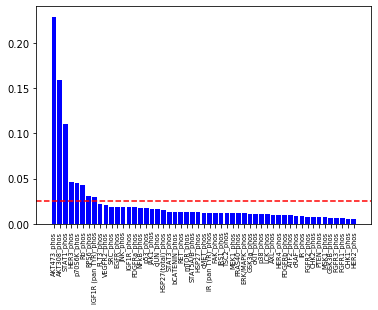

In [13]:
plt.xticks(rotation=90,fontsize=6.5)
plt.bar(perm_imp_rfpimp.index.values,perm_imp_rfpimp.Importance,color="blue")
plt.axhline(0.025,linestyle="dashed",color="red")
plt.savefig('RF_importances_python_Phosphochanges.png',dpi=300)



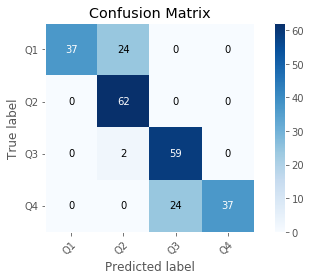

In [221]:
cm=sklearn.metrics.confusion_matrix(tobepredicted,converted_predicted)
classes = unique_labels(tobepredicted, converted_predicted)
classes=['Q1','Q2','Q3','Q4']

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.grid(False)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes,title="Confusion Matrix",ylabel='True label',xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

plt.savefig('RF_ConfusionMatrix_python_Phosphochanges.png',dpi=300)

In [189]:
binary_y= label_binarize(tobepredicted,classes=[1,2,3,4])
n_classes = binary_y.shape[1]
y_score=label_binarize(converted_predicted,classes=[1,2,3,4])

In [229]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binary_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])




In [232]:
roc_auc

{0: 0.8032786885245902,
 1: 0.9289617486338798,
 2: 0.9183891660727014,
 3: 0.8032786885245902}

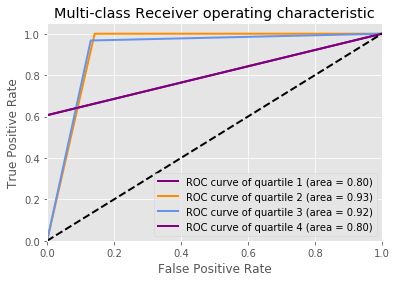

In [235]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_classes


# Plot all ROC curves
plt.figure()

colors = cycle(['purple', 'darkorange', 'cornflowerblue','purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of quartile {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('RF_ROC_python_Phosphochanges.png',dpi=300)